In [1]:
from analytic_psfs import Mie_Theory
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]

In [25]:
wave_pump_range = np.arange(400, 701)*1E-7
abs_cross_MIE = np.zeros(len(wave_pump_range))
sca_cross_MIE = np.zeros(len(wave_pump_range))

for idx, val in enumerate(wave_pump_range):
    mt = Mie_Theory(30E-7,1.473, val)
    abs_cross_MIE[idx], sca_cross_MIE[idx]  = mt.cross_sects(nTOT=1)

In [8]:
# val = 5
# mie_bem = loadmat(str('simulated_sphere_data/sphere_analysis/Sph')+str(val)+str('nm_JC_ret_l10_n1.473.mat'))

radii = np.arange(5,101,5)
num_wave = 200

mie_l10_JCvac_wave = np.zeros((len(radii),num_wave))
mie_l10_JCvac_ext = np.zeros((len(radii),num_wave))
mie_l10_JCvac_sca = np.zeros((len(radii),num_wave))
for count, val in enumerate(radii):
    mie_l10_JCvac_wave[count,:] = mie_bem['enei'][0]
    mie_l10_JCvac_ext[count, :] = mie_bem['ext'][0]
    mie_l10_JCvac_sca[count,:] = mie_bem['sca'][0]
print(radii[-1])

100


In [26]:
val = 30
mie_bem = loadmat(str('simulated_sphere_data/sphere_analysis/Sph')+str(val)+str('nm_JC_ret_l1_n1.473.mat'))

mie_l10_JCvac_wave= mie_bem['enei'][0]
mie_l10_JCvac_ext = mie_bem['ext'][0]
mie_l10_JCvac_sca= mie_bem['sca'][0]


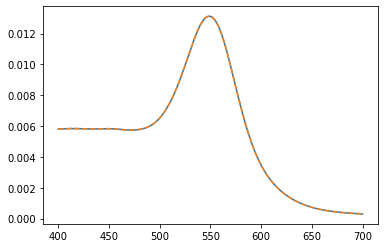

In [27]:
plt.plot(mie_l10_JCvac_wave, mie_l10_JCvac_ext-mie_l10_JCvac_sca)
plt.plot(wave_pump_range*1E7, abs_cross_MIE*(1E4)**2,'--')